In [1]:
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)

import statistics as sts
from scipy.stats import norm
from scipy.stats import t
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency

from datetime import date
import re

# Task

Missing values + outliers - Detection and Treatment + MORE 😁.

Dataset - adult.csv
Dataset Description - Google it  😑

Perform below mentioned tasks:   
Step - 1 - Introduction -> Give a detailed data description and objective.    
Step - 2 - Import the data and perform basic pandas operations.      
Step - 3 - Univariate Analysis -> PDF, Histograms, Boxplots, Countplots, etc..     
Understand the probability and frequency distribution of each numerical column     
Understand the frequency distribution of each categorical Variable/Column    
Mention observations after each plot.    
Step - 4 - Bivariate Analysis   
Discover the relationships between numerical columns using Scatter plots, hexbin plots, pair plots, etc..    
Identify the patterns between categorical and numerical columns using swarmplot, boxplot, barplot, etc..    
Mention observations after each plot.    
Step - 5 - In the above steps you might have encountered many missing values and outliers.    
Find and treat the outliers and missing values in each column 😥   
Read this Kaggle Notebook and understand various ways to detect and handle outliers. Try to implement the same. Outlier!!! The Silent Killer     
Step - 6 - Conclusion of EDA   
NOTE: Mention observations after each plot.🙄    

Step - 7 - Perform feature transformation:    
For Numerical Features -> Do Column Standardization    
For Categorical -> if more than 2 categories, use dummy variables. Otherwise convert the feature to Binary.      
Step - 8 - Build various Machine Learning models considering ‘income’ as target variable.    
Step - 9 - Create a table to compare the performance of each of the ML Model.     
Step - 10 - Read the research papers mentioned below & rethink the missing value treatment and feature engineering aspect. Try to document the things you are implementing from the research paper.     



## Step - 1 
- Introduction -> Give a detailed data description and objective.    


In [280]:
df = pd.read_csv('adult.csv')

In [281]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [282]:
df.shape

(48842, 15)

In [283]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

**We have 15 features and 48842 observations in the data**

### Objective:
 The objective is to find how income is variing based on the diffrent factors given
- $Dependent\ variable - income$

The dataset provides 14 input variables that are a mixture of categorical, ordinal, and numerical data types. The complete list of variables is as follows:

* $Age \Rightarrow Age $
* $Workclass  \Rightarrow workclass$
* $Final Weight.  \Rightarrow fnlwgt$
- $Education.  \Rightarrow education$
- $Education Number of Years.  \Rightarrow educational$
- $Marital-status.  \Rightarrow marital-status$
- $Occupation.  \Rightarrow  Occupation \ of \ the \ person$
- $Relationship.  \Rightarrow Type \ of \ relationship$
- $Race.   \Rightarrow Race \ of \ the \ person$
- $Sex.  \Rightarrow gender$
- $Capital-gain.  \Rightarrow Capital \ gains  \ obteined$
- $Capital-loss.  \Rightarrow capital-loss$
- $Hours-per-week.  \Rightarrow Average \ number \ of \ hour \ working \ per \ week$
- $Native-country.  \Rightarrow native-country$

**Output**:
- $income \Rightarrow Income \ level $


In [284]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [285]:
num_col = []
cat_col = []
for i in df.columns:
    if df[i].dtype== 'int64':
        num_col.append(i)
    else:
        cat_col.append(i)
        

In [286]:
num_col

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [287]:
cat_col

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

In [288]:
len(num_col),len(cat_col)

(6, 9)

**we have 6 numarical columns and 9 catagerical columns in the data**

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [290]:
df.describe(include='all') # to get basic stastics

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


### Missing values

**Let's the missing values in the data**

In [291]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

**By looks there is no null values in the data.**  

**Let's look deep in to the data.**

### Step3

# Univarient Analysis 

In [292]:
cat_col

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

### First check about categorical data

In [293]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

**If we observe there are some '?' in the data. Which is representing there are some null values in the data. So let's replace with NaN**


In [294]:
df['workclass'].replace('?',np.NaN,inplace= True)

In [295]:
(df['workclass'].isnull().sum()/df.shape[0])*100

5.7307235575938735

**5%of the data is missied in the workclass col** 

In [296]:
pd.DataFrame(df['workclass'].value_counts())

,workclass
Private,33906
Self-emp-not-inc,3862
Local-gov,3136
State-gov,1981
Self-emp-inc,1695
Federal-gov,1432
Without-pay,21
Never-worked,10


- Local-gov,State-gov, Federal-gov comes in to government jobs
- Self-emp-not-inc,Self-emp-inc comes to self employed

**Let's replace them**

In [297]:
df['workclass'].replace(['Local-gov','State-gov', 'Federal-gov'],'Government',inplace=True)
df['workclass'].replace(['Self-emp-not-inc','Self-emp-inc'],'Self employed ',inplace=True)


In [298]:
df['workclass'].value_counts()

Private           33906
Government         6549
Self employed      5557
Without-pay          21
Never-worked         10
Name: workclass, dtype: int64

<AxesSubplot:>

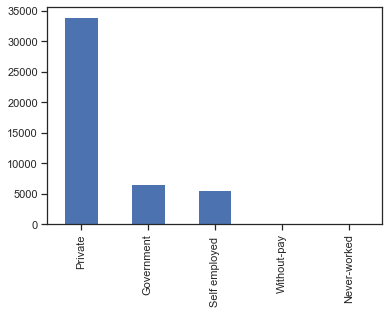

In [299]:
df.workclass.value_counts().plot(kind= 'bar')

**The people who are working the private sector  are more in the data.**

In [300]:
df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

**An ordered factor with levels Preschool < 1st-4th < 5th-6th < 7th-8th < 9th < 10th < 11th < 12th < HS-grad < Prof-school < Assoc-acdm < Assoc-voc < Some-college < Bachelors < Masters < Doctorate.**



- 1st to 8th comes in to Elementry education
- 9th to 12th comes in to High school graduate(HS-grad)

**Let's replace them in the data**


In [301]:
df.education.replace(['1st-4th','5th-6th','7th-8th'],'Elementry-school',inplace=True)
df.education.replace(['11th','10th','9th','12th'],'HS-grad',inplace=True)


In [302]:
(df['education'].value_counts()/df.shape[0])*100

HS-grad             41.763237
Some-college        22.271815
Bachelors           16.430531
Masters              5.439990
Assoc-voc            4.219729
Elementry-school     3.503133
Assoc-acdm           3.277917
Prof-school          1.707547
Doctorate            1.216166
Preschool            0.169936
Name: education, dtype: float64

**41% of the people completed their High school graduate(HS-grad)**

<AxesSubplot:>

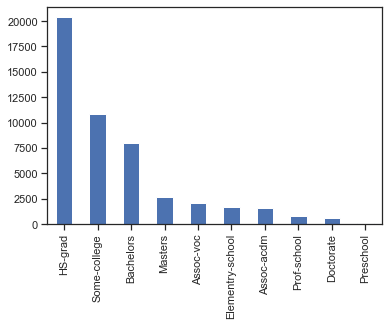

In [303]:
df.education.value_counts().plot(kind='bar')

**We can see that on total 75% of the people completed eithor HS-grad or Some-college education or Bachelors**

In [304]:
df['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

- **Divorced** and **Separated** are comes in to same let's combain them  in to one
- **Married-civ-spouse** corresponds to a civilian spouse while **Married-AF-spouse** is a spouse in the Armed Forces.let's replace with **Married**.
-  **Married-spouse-absent** Persons married, spouse absent are married persons whose spouse did not live in the same household. Such persons are further classified as separated or other married, spouse absent, as defined below. ... Widowed persons are those whose spouse had died and who were not remarried at the time of the enumeration.Let's retain as it is.


In [305]:
df['marital-status'].replace(['Divorced','Separated'],'Separated', inplace= True)
df['marital-status'].replace(['Married-civ-spouse','Married-AF-spouse'],'Married',inplace=True)

In [306]:
(df['marital-status'].value_counts()/df['marital-status'].shape[0])*100

Married                  45.894926
Never-married            32.998239
Separated                16.713075
Widowed                   3.107981
Married-spouse-absent     1.285779
Name: marital-status, dtype: float64

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='marital-status', ylabel='count'>

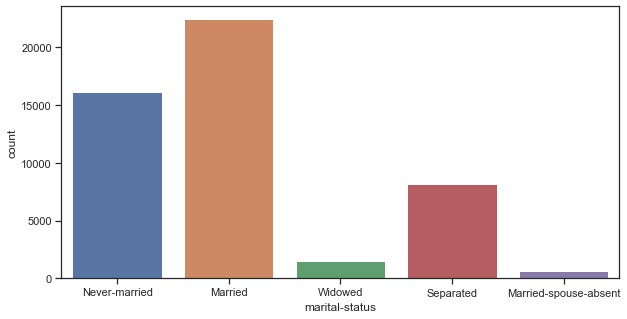

In [307]:
plt.figure(figsize=(10,5))
sns.countplot(df['marital-status'])

**In the given data 45% of the people are married**

In [308]:
df['occupation'].value_counts()
print("*************************************")
(df['occupation'].value_counts()/df.occupation.shape[0])*100

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

*************************************


Prof-specialty       12.636665
Craft-repair         12.513820
Exec-managerial      12.460587
Adm-clerical         11.488064
Sales                11.268990
Other-service        10.079440
Machine-op-inspct     6.187298
?                     5.751198
Transport-moving      4.821670
Handlers-cleaners     4.242251
Farming-fishing       3.050653
Tech-support          2.960567
Protective-serv       2.012612
Priv-house-serv       0.495475
Armed-Forces          0.030711
Name: occupation, dtype: float64

**There are some null values('?') in the data let's repalce with NaN**

In [309]:
df.occupation.replace(['?'],np.NaN, inplace= True)

In [310]:
(df.occupation.isnull().sum()/df.shape[0])*100

5.751197739650301

**Around 6% of the data missied in the  occupation column**

In [311]:
(df.occupation.value_counts()/df.occupation.shape[0])*100

Prof-specialty       12.636665
Craft-repair         12.513820
Exec-managerial      12.460587
Adm-clerical         11.488064
Sales                11.268990
Other-service        10.079440
Machine-op-inspct     6.187298
Transport-moving      4.821670
Handlers-cleaners     4.242251
Farming-fishing       3.050653
Tech-support          2.960567
Protective-serv       2.012612
Priv-house-serv       0.495475
Armed-Forces          0.030711
Name: occupation, dtype: float64

<Figure size 720x360 with 0 Axes>

<AxesSubplot:>

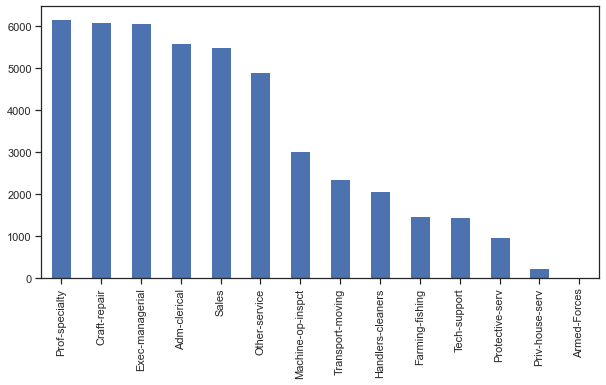

In [312]:
plt.figure(figsize=(10,5))
df.occupation.value_counts().plot(kind='bar')

The top three classes in the occupation are **Prof-specialty,Craft-repair,Adm-clerical**

In [313]:
cat_col

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

In [314]:
df['relationship'].value_counts()
print('*****************************')
(df['relationship'].value_counts()/df.shape[0])*100

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

*****************************


Husband           40.366897
Not-in-family     25.762663
Own-child         15.521477
Unmarried         10.493018
Wife               4.772532
Other-relative     3.083412
Name: relationship, dtype: float64

<Figure size 720x288 with 0 Axes>

<AxesSubplot:xlabel='relationship', ylabel='count'>

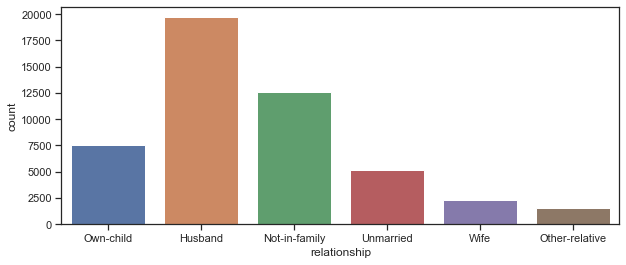

In [315]:
plt.figure(figsize=(10,4))
sns.countplot(df.relationship)

**We can see that Husband relation is high in the data**

In [316]:
df['race'].value_counts()
print("******************************")
(df['race'].value_counts()/df.shape[0])*100

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

******************************


White                 85.504279
Black                  9.592154
Asian-Pac-Islander     3.110028
Amer-Indian-Eskimo     0.962287
Other                  0.831252
Name: race, dtype: float64

In [317]:
df.race.unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

<Figure size 720x288 with 0 Axes>

<AxesSubplot:xlabel='race', ylabel='count'>

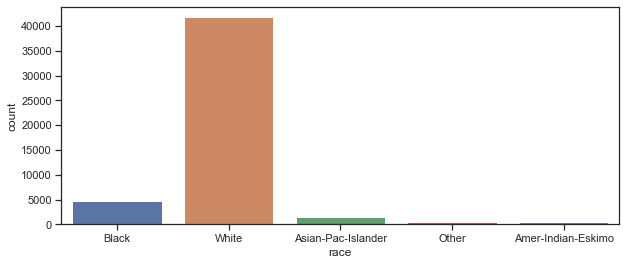

In [318]:
plt.figure(figsize=(10,4))
sns.countplot(df['race'])

In [319]:
df['race'].replace(['Black', 'Asian-Pac-Islander', 'Other','Amer-Indian-Eskimo'],'Other',inplace= True)

In [320]:
df['race'].value_counts()

White    41762
Other     7080
Name: race, dtype: int64

<AxesSubplot:ylabel='race'>

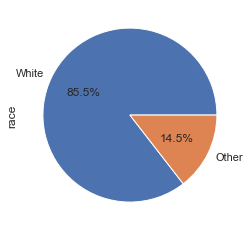

In [321]:
df.race.value_counts().plot(kind= 'pie',autopct='%.1f%%')

- As we are seeing almost 85% of the people are single calss . lest's comabain remaining all class in to  single class as other

**We can see white class is more in race data** (around 80%)

In [322]:
df['gender'].value_counts()
print('*************************')
(df['gender'].value_counts()/df.shape[0])*100


Male      32650
Female    16192
Name: gender, dtype: int64

*************************


Male      66.848204
Female    33.151796
Name: gender, dtype: float64

<AxesSubplot:xlabel='gender', ylabel='count'>

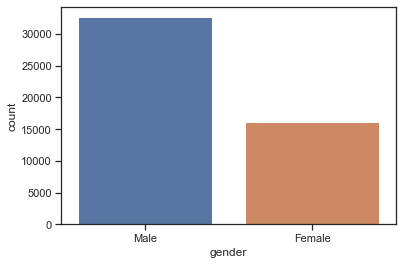

In [323]:
sns.countplot(df.gender)

<AxesSubplot:ylabel='gender'>

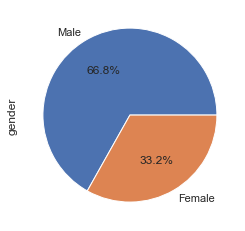

In [324]:
df.gender.value_counts().plot(kind= 'pie',autopct='%.1f%%')

**66% of the people are Male in the data**

In [325]:
df['native-country'].value_counts()
print('*********************************')
(df['native-country'].value_counts()/df.shape[0])*100

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

*********************************


United-States                 89.742435
Mexico                         1.947095
?                              1.754637
Philippines                    0.603988
Germany                        0.421768
Puerto-Rico                    0.376725
Canada                         0.372630
El-Salvador                    0.317350
India                          0.309160
Cuba                           0.282544
England                        0.260022
China                          0.249785
South                          0.235453
Jamaica                        0.217026
Italy                          0.214979
Dominican-Republic             0.210884
Japan                          0.188362
Guatemala                      0.180173
Poland                         0.178125
Vietnam                        0.176078
Columbia                       0.174031
Haiti                          0.153556
Portugal                       0.137177
Taiwan                         0.133082
Iran                           0.120798


**There are sum null values('?') in the data let's replace them with np.NaN**

In [326]:
df['native-country'].replace(['?'],np.NaN,inplace=True)

In [327]:
(df['native-country'].isnull().sum()/df.shape[0])*100

1.7546374022357807

**We can see that around 2% of the data are null values**

**we can see that around 90% of the people are United-States and remaining 10% of the people from other countries**
- Let's make remaining all as single category as **Other** 

In [328]:
df['native-country'].unique()

array(['United-States', nan, 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [329]:
df['native-country'].replace(['Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'],'Other',inplace=True)

In [330]:
df['native-country'].value_counts()

United-States    43832
Other             4153
Name: native-country, dtype: int64

<AxesSubplot:xlabel='native-country', ylabel='count'>

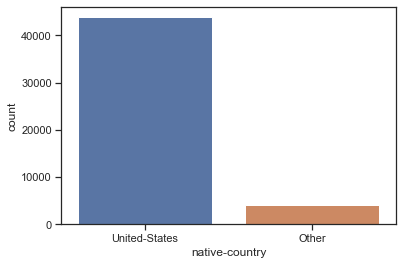

In [331]:
sns.countplot(df['native-country'])

<AxesSubplot:ylabel='native-country'>

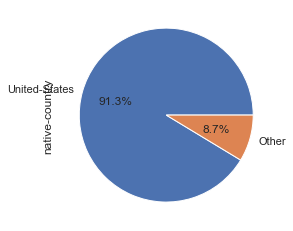

In [332]:
df['native-country'].value_counts().plot(kind= 'pie',autopct='%.1f%%')

In [333]:
df['income'].value_counts()
print('******************************')
(df['income'].value_counts()/df['income'].shape[0])*100


<=50K    37155
>50K     11687
Name: income, dtype: int64

******************************


<=50K    76.071823
>50K     23.928177
Name: income, dtype: float64

<AxesSubplot:xlabel='income', ylabel='count'>

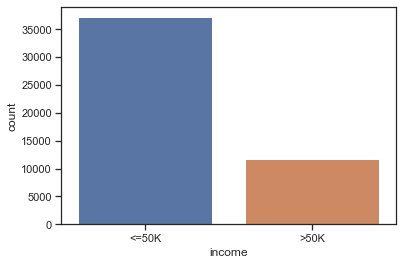

In [334]:
sns.countplot(df.income)

<AxesSubplot:ylabel='income'>

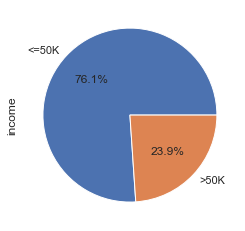

In [335]:
df.income.value_counts().plot(kind= 'pie',autopct='%.1f%%')

**The people who are less then 50k are more in the data.Almost 76% of the data**

In [336]:
num_col

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [337]:
df.age.value_counts()

36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64

### Let's Check the numarical data

In [338]:
num_col

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [339]:
# let's define one function to find the upper limit and lower limits of the data

def Upper_Lower(col):
    Q1 = np.percentile(col,25)
    Q3 = np.percentile(col,75)
    IQR = Q3-Q1
    LL = Q1-(1.5*IQR)
    UL = Q3+(1.5*IQR)
    return(UL,LL)
    

In [340]:
df.age.unique()

array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
       37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
       76, 84, 89, 88, 87, 86], dtype=int64)

In [341]:
df.age.value_counts()
print('******************************')
(df.age.value_counts()/df.shape[0])*100

36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64

******************************


36    2.759920
35    2.737398
33    2.733303
23    2.721019
31    2.712829
        ...   
88    0.012285
85    0.010237
87    0.006142
89    0.004095
86    0.002047
Name: age, Length: 74, dtype: float64

In [342]:
df.age.describe(include='all')

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

**The  minimum age of person is 17 and maximum is 90**

<AxesSubplot:xlabel='age', ylabel='Density'>

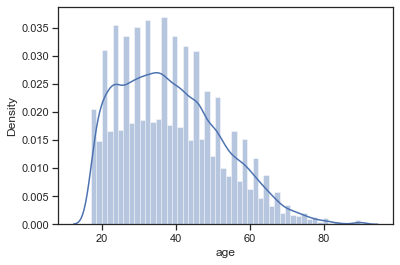

In [343]:
sns.distplot(df.age)

**From the above hist plot we can see that 25-45 age people are more in the data**
- data is skwed one right side

In [344]:
df.age.skew()

0.5575803166133181

In [345]:
df.age.kurt()

-0.18426874062387766

<AxesSubplot:xlabel='age'>

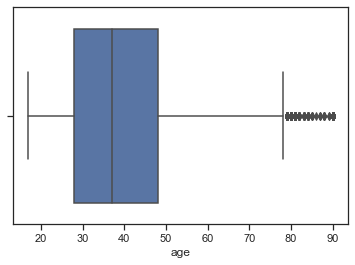

In [346]:
sns.boxplot(df.age)

**We can see that there are some outliers in the data**

In [347]:
UL,LL= Upper_Lower(df.age)
UL,LL    #Upper limit and lower limit

(78.0, -2.0)

In [348]:
df.age[(df.age<LL)|(df.age>UL)]

193      79
234      80
899      90
926      79
951      80
         ..
48558    90
48648    90
48740    85
48775    82
48806    81
Name: age, Length: 216, dtype: int64

In [349]:
df.age[(df.age<LL)|(df.age>UL)].unique()

array([79, 80, 90, 81, 82, 83, 85, 84, 89, 88, 87, 86], dtype=int64)

In [350]:
np.percentile(df.age,99)

74.0

In [351]:
(df[(df.age<LL)|(df.age>UL)].shape[0]/df.shape[0])*100

0.4422423324188199

In the given data the percentage of the outliers of age is very less. 

**Let's do box-cox transformation**

In [352]:
df['age_trans'],l = stats.boxcox(df.age)

((array([-4.18606635, -3.98006955, -3.86775228, ...,  3.86775228,
          3.98006955,  4.18606635]),
  array([3.66638737, 3.66638737, 3.66638737, ..., 6.84091797, 6.84091797,
         6.84091797])),
 (0.6713669232273171, 5.016307563283449, 0.9928494483674869))

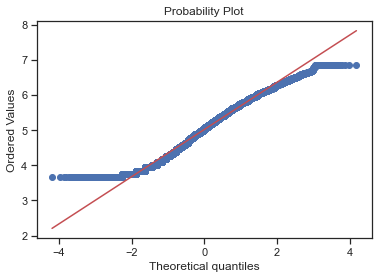

In [353]:
stats.probplot(df['age_trans'],plot=plt)

<AxesSubplot:xlabel='age_trans'>

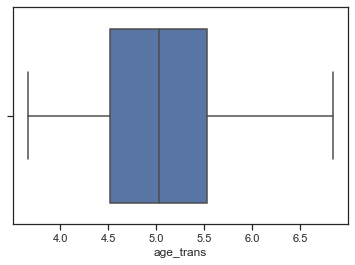

In [354]:
sns.boxplot(df['age_trans'])

<AxesSubplot:xlabel='age_trans', ylabel='Density'>

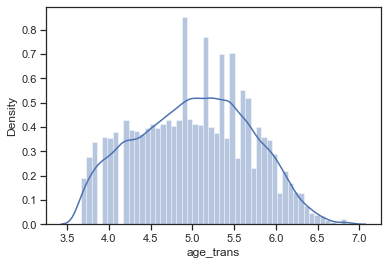

In [355]:
sns.distplot(df['age_trans'])

In [356]:
df1 = df.drop(df.age[(df.age<LL)|(df.age>UL)].index)

In [357]:
df1.shape

(48626, 16)

In [358]:
df.shape

(48842, 16)

In [359]:
df['fnlwgt'].unique()

array([226802,  89814, 336951, ..., 129912, 255835, 257302], dtype=int64)

educational-num : the highest level of education achieved in numerical form.    
○ Integer greater than 0

In [360]:
df['educational-num'].value_counts()

9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: educational-num, dtype: int64

<AxesSubplot:>

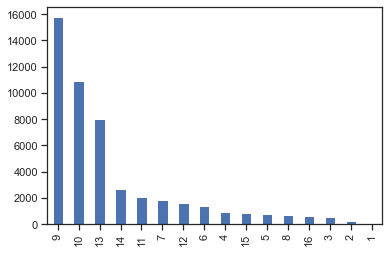

In [361]:
df['educational-num'].value_counts().plot(kind='bar')

**The people who completed their 9th standed eduction are more in the data**

<AxesSubplot:xlabel='educational-num', ylabel='Density'>

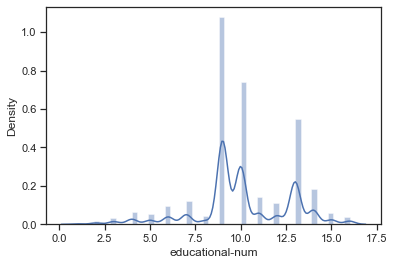

In [362]:
sns.distplot(df['educational-num'])

<AxesSubplot:xlabel='educational-num'>

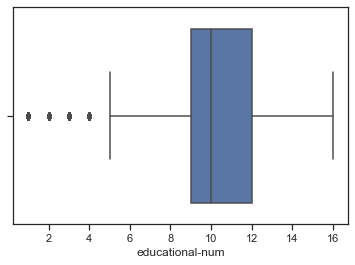

In [363]:
sns.boxplot(df['educational-num'])

**There are some outliers in the data**

In [364]:
UL,LL = Upper_Lower(df['educational-num'])
UL,LL

(16.5, 4.5)

In [365]:
df[(df['educational-num']<LL)|(df['educational-num']>UL)]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,age_trans
9,55,Private,104996,Elementry-school,4,Married,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K,5.804831
22,72,NaN,132015,Elementry-school,4,Separated,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K,6.360399
37,22,Private,248446,Elementry-school,3,Never-married,Priv-house-serv,Not-in-family,White,Male,0,0,50,Other,<=50K,4.099116
46,39,Private,290208,Elementry-school,4,Married,Craft-repair,Husband,White,Male,0,0,40,Other,<=50K,5.132669
91,49,Government,77443,Elementry-school,4,Never-married,Other-service,Not-in-family,Other,Male,0,0,20,United-States,<=50K,5.574453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48712,51,Private,274502,Elementry-school,4,Separated,Machine-op-inspct,Not-in-family,White,Female,0,0,48,United-States,<=50K,5.653714
48713,36,Private,208068,Preschool,1,Separated,Other-service,Not-in-family,Other,Male,0,0,72,Other,<=50K,4.981877
48729,61,Private,137554,Elementry-school,4,Married,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K,6.015321
48760,64,Government,222966,Elementry-school,4,Married,Other-service,Wife,Other,Female,0,0,40,United-States,<=50K,6.114220


In [366]:
(df[(df['educational-num']<LL)|(df['educational-num']>UL)].shape[0]/df.shape[0])*100

3.6730682609229763

In [367]:
# around 4% data as outliers

In [368]:
index = list(df[(df['educational-num']<LL)|(df['educational-num']>UL)].index)

In [369]:
index

[9,
 22,
 37,
 46,
 91,
 137,
 152,
 193,
 206,
 217,
 323,
 342,
 347,
 371,
 420,
 463,
 476,
 498,
 515,
 519,
 540,
 566,
 590,
 614,
 637,
 639,
 715,
 734,
 770,
 779,
 818,
 838,
 853,
 890,
 929,
 946,
 961,
 962,
 969,
 1013,
 1029,
 1058,
 1059,
 1063,
 1079,
 1091,
 1094,
 1103,
 1109,
 1133,
 1134,
 1156,
 1174,
 1186,
 1235,
 1279,
 1309,
 1321,
 1331,
 1334,
 1339,
 1390,
 1394,
 1398,
 1406,
 1466,
 1489,
 1498,
 1511,
 1532,
 1562,
 1577,
 1584,
 1602,
 1658,
 1664,
 1668,
 1723,
 1775,
 1834,
 1857,
 1858,
 1861,
 1894,
 1898,
 1952,
 2000,
 2002,
 2023,
 2028,
 2034,
 2037,
 2073,
 2076,
 2138,
 2200,
 2203,
 2229,
 2364,
 2369,
 2399,
 2401,
 2410,
 2465,
 2510,
 2553,
 2566,
 2598,
 2654,
 2661,
 2709,
 2772,
 2786,
 2843,
 2848,
 2872,
 2884,
 2920,
 2939,
 2970,
 2979,
 2982,
 2983,
 2991,
 3036,
 3037,
 3038,
 3052,
 3086,
 3117,
 3129,
 3144,
 3168,
 3175,
 3177,
 3220,
 3341,
 3348,
 3416,
 3497,
 3507,
 3515,
 3540,
 3552,
 3568,
 3580,
 3655,
 3698,
 3723,
 3

In [370]:
for i in index:
    if i in list(df1.index):
        df1.drop(i,inplace=True,axis=0)


In [371]:
df1.shape

(46872, 16)

In [372]:
num_col

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [373]:
df['capital-gain'].unique()

array([    0,  7688,  3103,  6418,  7298,  3908, 14084,  5178, 15024,
       99999,  2597,  2907,  4650,  6497,  1055,  5013, 27828,  4934,
        4064,  3674,  2174, 10605,  3418,   114,  2580,  3411,  4508,
        4386,  8614, 13550,  6849,  2463,  3137,  2885,  2964,  1471,
       10566,  2354,  1424,  1455,  3325,  4416, 25236,   594,  2105,
        4787,  2829,   401,  4865,  1264,  1506, 10520,  3464,  2653,
       20051,  4101,  1797,  2407,  3471,  1086,  1848, 14344,  1151,
        2993,  2290, 15020,  9386,  2202,  3818,  2176,  5455, 11678,
        7978,  7262,  6514, 41310,  3456,  7430,  2414,  2062, 34095,
        1831,  6723,  5060, 15831,  2977,  2346,  3273,  2329,  9562,
        2635,  4931,  1731,  6097,   914,  7896,  5556,  1409,  3781,
        3942,  2538,  3887, 25124,  7443,  5721,  1173,  4687,  6612,
        6767,  2961,   991,  2036,  2936,  2050,  1111,  2228, 22040,
        3432,  6360,  2009,  1639, 18481,  2387], dtype=int64)

In [374]:
(df['capital-gain'].value_counts()/df.shape[0])*100

0        91.738668
15024     1.050326
7688      0.839441
7298      0.745260
99999     0.499570
           ...    
2387      0.002047
22040     0.002047
6612      0.002047
1111      0.002047
1639      0.002047
Name: capital-gain, Length: 123, dtype: float64

<AxesSubplot:xlabel='capital-gain', ylabel='Density'>

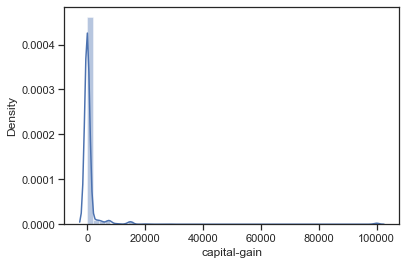

In [375]:
sns.distplot(df['capital-gain'])

- 90% of the data contain 0 as capital gain data

In [376]:
(df['capital-loss'].value_counts()/df.shape[0])*100

0       95.327792
1902     0.622415
1977     0.517997
1887     0.477048
2415     0.147414
          ...    
1539     0.002047
2489     0.002047
2201     0.002047
1421     0.002047
1870     0.002047
Name: capital-loss, Length: 99, dtype: float64

* 95% of the values are 0 in thee given capital-loss data

In [377]:
### As we have 90% of the data as 0  in 'capital-gain','capital-loss' dropping both the colums

df.drop(['capital-gain','capital-loss'],axis=1,inplace= True)

In [378]:
df['hours-per-week'].unique()

array([40, 50, 30, 32, 10, 39, 35, 48, 25, 20, 45, 47,  6, 43, 90, 54, 60,
       38, 36, 18, 24, 44, 56, 28, 16, 41, 22, 55, 14, 33, 37,  8, 12, 70,
       15, 75, 52, 84, 42, 80, 68, 99, 65,  5, 17, 72, 53, 29, 96, 21, 46,
        3,  1, 23, 49, 67, 76,  7,  2, 58, 26, 34,  4, 51, 78, 63, 31, 92,
       77, 27, 85, 13, 19, 98, 62, 66, 57, 11, 86, 59,  9, 64, 73, 61, 88,
       79, 89, 74, 69, 87, 97, 94, 82, 91, 81, 95], dtype=int64)

<AxesSubplot:xlabel='hours-per-week', ylabel='Density'>

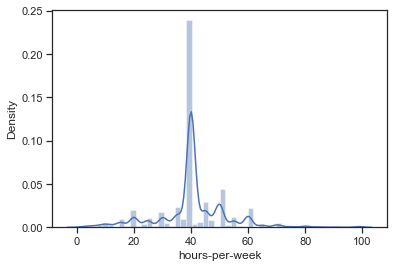

In [379]:
sns.distplot(df['hours-per-week'])

* From the hist plot we can see that most of the people working 40 hours per week

- There are some outliers in the data

In [380]:
UL,LL = Upper_Lower(df['hours-per-week'])

In [381]:
df[(df['hours-per-week']<LL)|(df['hours-per-week']>UL)]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,age_trans
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,30,United-States,<=50K,3.760644
5,34,Private,198693,HS-grad,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K,4.875481
7,63,Self employed,104626,Prof-school,15,Married,Prof-specialty,Husband,White,Male,32,United-States,>50K,6.081687
9,55,Private,104996,Elementry-school,4,Married,Craft-repair,Husband,White,Male,10,United-States,<=50K,5.804831
16,20,Government,444554,Some-college,10,Never-married,Other-service,Own-child,White,Male,25,United-States,<=50K,3.936875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48825,31,Private,199655,Masters,14,Separated,Other-service,Not-in-family,Other,Female,30,United-States,<=50K,4.705765
48826,39,Government,111499,Assoc-acdm,12,Married,Adm-clerical,Wife,White,Female,20,United-States,>50K,5.132669
48829,65,Self employed,99359,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,60,United-States,<=50K,6.146337
48834,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Other,Male,11,Other,<=50K,4.763788


In [382]:
(df[(df['hours-per-week']<LL)|(df['hours-per-week']>UL)].shape[0]/df.shape[0])*100

27.631956103353673

In [383]:
# as we have large amout of data lest's even throut it is around 28% we create separate  dataset with out outliers

index = list(df[(df['hours-per-week']<LL)|(df['hours-per-week']>UL)].index)
for i in index:
    if i in list(df1.index):
        df1.drop(i,inplace=True,axis=0)

**Education and educational-num are representing the same let's remove one of them**

### step 4

# Bivarient Analysis

**Let's fisrt check catagerical variables with income**

In [384]:
cat_col

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

In [107]:
pd.crosstab(df['workclass'],df['income'],margins= True)

income,<=50K,>50K,All
workclass,,,
Government,4531,2018,6549
Never-worked,10,0,10
Private,26519,7387,33906
Self employed,3542,2015,5557
Without-pay,19,2,21
All,34621,11422,46043


In [108]:
(pd.crosstab(df['workclass'],df['income'],margins= True)/df.shape[0])*100

income,<=50K,>50K,All
workclass,,,
Government,9.276852,4.131690,13.408542
Never-worked,0.020474,0.000000,0.020474
Private,54.295483,15.124278,69.419762
Self employed,7.251955,4.125548,11.377503
Without-pay,0.038901,0.004095,0.042996
All,70.883666,23.385611,94.269276


**In private sector most of the plople getting less then 50K income**(around 54% of the people)

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='workclass', ylabel='count'>

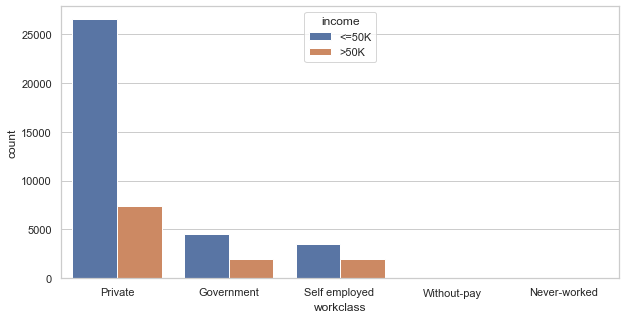

In [109]:
plt.figure(figsize=(10,5))
sns.countplot(x='workclass',hue='income',data=df )

**From graph we can see that in every sector the people who are getting less then 50k are more**

- Let's check corelation b/w the two variables

#### Step 1

**Chi_squre test.**   
- Let's define the hypothesis 

$$ H_1 = They \ are \ dependent$$   
$$ H_0 = They \ are \ independent$$

#### Step 2

In [110]:
#Looking at the freqency distribution

observed =pd.crosstab(df['workclass'],df['income'])

#### Step 3

In [111]:
chi2_contingency(observed)

(689.2368602076602,
 7.459579330731911e-148,
 4,
 array([[4.92437350e+03, 1.62462650e+03],
        [7.51927546e+00, 2.48072454e+00],
        [2.54948554e+04, 8.41114463e+03],
        [4.17846137e+03, 1.37853863e+03],
        [1.57904785e+01, 5.20952153e+00]]))

In [112]:
chi2_test_stat = chi2_contingency(observed)[0]
p_value= chi2_contingency(observed)[1]
degrre_of_freedom = chi2_contingency(observed)[2]

#### Step 4

In [113]:
confidence_level = 0.90
alpha = 1 - confidence_level
chi2_critical = chi2.ppf(1 - alpha, degrre_of_freedom)
chi2_critical


7.779440339734858

#### Step 5

In [114]:
if(chi2_test_stat > chi2_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")


Reject Null Hypothesis


In [115]:
if p_value<alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")


Reject Null Hypothesis


$$ Both\ workclass\& \ income\ variables\ are\ dependent\ variables$$

In [116]:
pd.crosstab(df['income'],df['education'],margins=True)

education,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,Elementry-school,HS-grad,Masters,Preschool,Prof-school,Some-college,All
income,,,,,,,,,,,
<=50K,1188,1539,4712,163,1614,17627,1198,82,217,8815,37155
>50K,413,522,3313,431,97,2771,1459,1,617,2063,11687
All,1601,2061,8025,594,1711,20398,2657,83,834,10878,48842


In [117]:
(pd.crosstab(df['income'],df['education'],margins=True)/df.shape[0])*100

education,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,Elementry-school,HS-grad,Masters,Preschool,Prof-school,Some-college,All
income,,,,,,,,,,,
<=50K,2.432333,3.150977,9.647435,0.333729,3.304533,36.089841,2.452807,0.167888,0.444290,18.047991,76.071823
>50K,0.845584,1.068752,6.783097,0.882437,0.198600,5.673396,2.987183,0.002047,1.263257,4.223824,23.928177
All,3.277917,4.219729,16.430531,1.216166,3.503133,41.763237,5.439990,0.169936,1.707547,22.271815,100.000000


<Figure size 1080x360 with 0 Axes>

<AxesSubplot:xlabel='education', ylabel='count'>

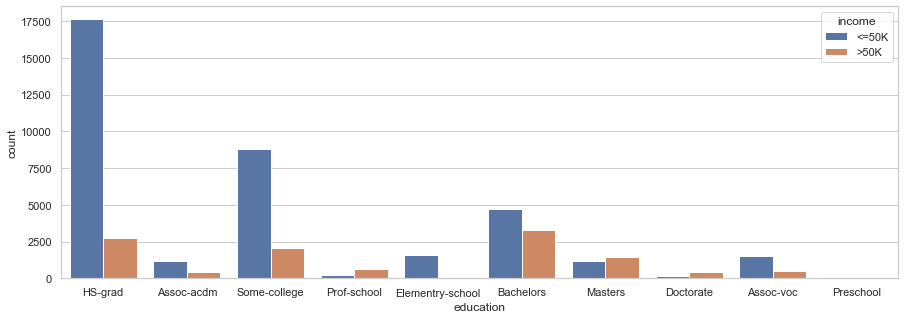

In [118]:
plt.figure(figsize=(15,5))
sns.countplot(x='education', hue= 'income', data=df)

- From the table we can see that the people who completed Doctorate,Masters,Prof-school are earning more then 50k when compared to total people in that class.
- In the given data we have 16% of the people completed Bachelors education. In that 16% around 7% of the people are earning more then 50k.
- In the Hs-grad class most of the people are earning less then 50K.

**Let's check is there any corelation B/W them.**
- Chi-squre test
#### Step 1

- Let's define the hypothesis.

$$ H_1 = They\ are\ dependent$$

$$ H_0 = They\ are\ independent$$
#### Step 2

In [119]:
#Let's check the frequencies
observed = pd.crosstab(df['income'],df['education'])

In [120]:
chi2_contingency(observed)

(6337.130842102345,
 0.0,
 9,
 array([[ 1217.90989312,  1567.84028091,  6104.76383031,   451.86663118,
          1301.5888989 , 15517.13054338,  2021.22834855,    63.13961345,
           634.43900741,  8275.09295279],
        [  383.09010688,   493.15971909,  1920.23616969,   142.13336882,
           409.4111011 ,  4880.86945662,   635.77165145,    19.86038655,
           199.56099259,  2602.90704721]]))

#### Step 3
- test stastics

In [121]:
chi_test_stat = chi2_contingency(observed)[0]
p_value= chi2_contingency(observed)[1]
degrre_of_freedom = chi2_contingency(observed)[2]

#### Step 4

In [122]:
#let's define the alpha
confidence_level = 0.98
alpha = 1-confidence_level
chi_critical = chi2.ppf(1-alpha,degrre_of_freedom)
chi_critical

19.679016094854546

#### Step 5

In [123]:
if(chi2_test_stat > chi2_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")


Reject Null Hypothesis


In [124]:
if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")


Reject Null Hypothesis



$$ Both\ education\& \ income\ variables\ are\ dependent\ variables$$

In [125]:
pd.crosstab(df['marital-status'],df['income'],margins=True)
print('***********************************')
(pd.crosstab(df['marital-status'],df['income'],margins=True)/df.shape[0])*100

income,<=50K,>50K,All
marital-status,,,
Married,12418,9998,22416
Married-spouse-absent,570,58,628
Never-married,15384,733,16117
Separated,7393,770,8163
Widowed,1390,128,1518
All,37155,11687,48842


***********************************


income,<=50K,>50K,All
marital-status,,,
Married,25.424839,20.470087,45.894926
Married-spouse-absent,1.167028,0.118750,1.285779
Never-married,31.497482,1.500758,32.998239
Separated,15.136563,1.576512,16.713075
Widowed,2.845911,0.262070,3.107981
All,76.071823,23.928177,100.000000


<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='marital-status', ylabel='count'>

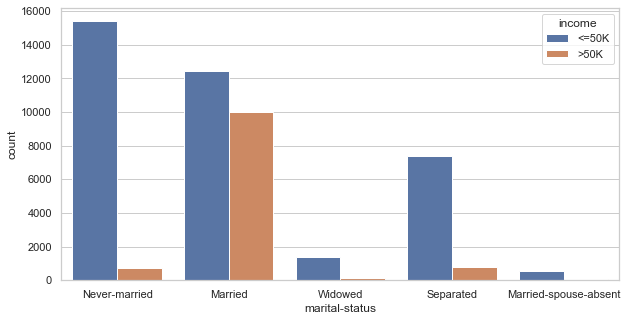

In [126]:
plt.figure(figsize=(10,5))
sns.countplot(x='marital-status',hue='income',data=df)

- We can see that in every class the people who are getting less then 50K are more.

**Let's check the corelation between columns**

In [127]:
# Let's define function for chi squre
def chi_saqure(x,y):
#Let's check the frequencies
    observed = pd.crosstab(x,y)
    chi2_contingency(observed)
    chi_test_stat = chi2_contingency(observed)[0]
    p_value= chi2_contingency(observed)[1]
    degrre_of_freedom = chi2_contingency(observed)[2]
    confidence_level = 0.98
    alpha = 1-confidence_level
    chi_critical = chi2.ppf(1-alpha,degrre_of_freedom)
    return(chi_test_stat,chi_critical,p_value,alpha)
    

In [128]:
chi_test_stat,chi_critical,p_value,alpha = chi_saqure(df['marital-status'],df['income'])
chi_test_stat,chi_critical,p_value,alpha

(9806.006669222046, 11.667843403834778, 0.0, 0.020000000000000018)

In [129]:
if(chi2_test_stat > chi2_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")


Reject Null Hypothesis


In [130]:
if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")


Reject Null Hypothesis


$$ Both\ marital-status\& \ income\ variables\ are\ dependent\ variables$$

In [131]:
cat_col

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

In [132]:
pd.crosstab(df['income'],df['occupation'],margins=True)
print('*****************************')
(pd.crosstab(df['income'],df['occupation'],margins=True)/df.shape[0])*100


occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,All
income,,,,,,,,,,,,,,,
<=50K,4843,10,4729,3178,1317,1934,2650,4719,239,3388,675,4029,1026,1874,34611
>50K,768,5,1383,2908,173,138,372,204,3,2784,308,1475,420,481,11422
All,5611,15,6112,6086,1490,2072,3022,4923,242,6172,983,5504,1446,2355,46033


*****************************


occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,All
income,,,,,,,,,,,,,,,
<=50K,9.915646,0.020474,9.682241,6.506695,2.696450,3.959707,5.425658,9.661767,0.489333,6.936653,1.382007,8.249048,2.100651,3.836862,70.863192
>50K,1.572417,0.010237,2.831579,5.953892,0.354203,0.282544,0.761640,0.417673,0.006142,5.700012,0.630605,3.019942,0.859916,0.984808,23.385611
All,11.488064,0.030711,12.513820,12.460587,3.050653,4.242251,6.187298,10.079440,0.495475,12.636665,2.012612,11.268990,2.960567,4.821670,94.248802


<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='count', ylabel='occupation'>

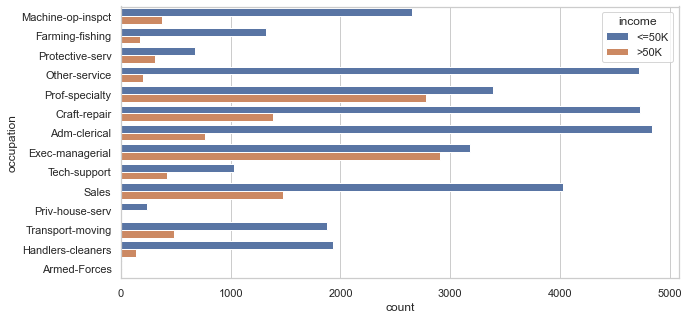

In [133]:
plt.figure(figsize=(10,5))
sns.countplot(y='occupation',hue= 'income',data=df)

- From the plot and and table we can clarly see that the in every depertment the people who are getting less then 50k are more.
- In Exec-managerial and Prof-specialty we have more people who are earning more then 50k.

In [134]:
chi_test_stat,chi_critical,p_value,alpha = chi_saqure(df['occupation'],df['income'])
chi_test_stat,chi_critical,p_value,alpha

(5502.144900139091, 25.47150914468225, 0.0, 0.020000000000000018)

In [135]:
if(chi2_test_stat > chi2_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")


Reject Null Hypothesis


In [136]:
if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")


Reject Null Hypothesis


$$ Both\ occupation \& \ income\ variables\ are\ dependent\ variables$$

In [137]:
pd.crosstab(df['income'],df['relationship'],margins=True)
print('***************************************')
(pd.crosstab(df['income'],df['relationship'],margins=True)/df.shape[0])*100


relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,All
income,,,,,,,
<=50K,10870,11307,1454,7470,4816,1238,37155
>50K,8846,1276,52,111,309,1093,11687
All,19716,12583,1506,7581,5125,2331,48842


***************************************


relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,All
income,,,,,,,
<=50K,22.255436,23.150158,2.976946,15.294214,9.860366,2.534704,76.071823
>50K,18.111461,2.612506,0.106466,0.227263,0.632652,2.237828,23.928177
All,40.366897,25.762663,3.083412,15.521477,10.493018,4.772532,100.000000


<AxesSubplot:xlabel='count', ylabel='relationship'>

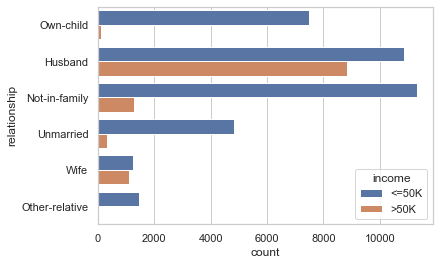

In [138]:
sns.countplot(y='relationship',hue='income',data=df)

- From the plot and and table we can clarly see that the in every relationship the people who are getting less then 50k are more.
- In Husbend and wife we have more people who are earning more then 50k.

**Let's check the correlation**

In [139]:
chi_test_stat,chi_critical,p_value,alpha = chi_saqure(df['relationship'],df['income'])
chi_test_stat,chi_critical,p_value,alpha

(10088.722490152224, 13.38822259903634, 0.0, 0.020000000000000018)

In [140]:
if(chi2_test_stat > chi2_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")


Reject Null Hypothesis


In [141]:
if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")


Reject Null Hypothesis


$$ Both\ relationship \& \ income\ variables\ are\ dependent\ variables$$

In [142]:
pd.crosstab(df['income'],df['race'],margins=True)
print('***********************************')
(pd.crosstab(df['income'],df['race'],margins=True)/df.shape[0])*100


race,Other,White,All
income,,,
<=50K,6000,31155,37155
>50K,1080,10607,11687
All,7080,41762,48842


***********************************


race,Other,White,All
income,,,
<=50K,12.284509,63.787314,76.071823
>50K,2.211212,21.716965,23.928177
All,14.495721,85.504279,100.000000


<AxesSubplot:xlabel='count', ylabel='race'>

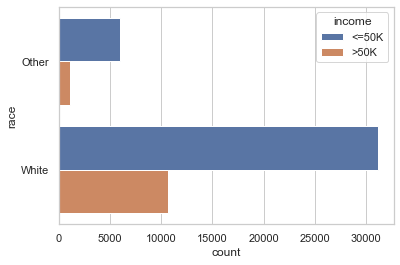

In [143]:
sns.countplot(y='race',hue= 'income',data=df)

- The people who are earning more then 50k, White people are more around(20%)

In [144]:
chi_test_stat,chi_critical,p_value,alpha = chi_saqure(df['race'],df['income'])
chi_test_stat,chi_critical,p_value,alpha

(341.69392421526,
 5.411894431054342,
 2.7287685643121156e-76,
 0.020000000000000018)

In [145]:
if(chi2_test_stat > chi2_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")


Reject Null Hypothesis


In [146]:
if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


$$ Both\ race \& \ income\ variables\ are\ dependent\ variables$$

In [147]:
pd.crosstab(df['income'],df['gender'],margins=True)
print('*********************************************')
(pd.crosstab(df['income'],df['gender'],margins=True)/df.shape[0])*100


gender,Female,Male,All
income,,,
<=50K,14423,22732,37155
>50K,1769,9918,11687
All,16192,32650,48842


*********************************************


gender,Female,Male,All
income,,,
<=50K,29.529913,46.541911,76.071823
>50K,3.621883,20.306294,23.928177
All,33.151796,66.848204,100.000000


<AxesSubplot:xlabel='gender', ylabel='count'>

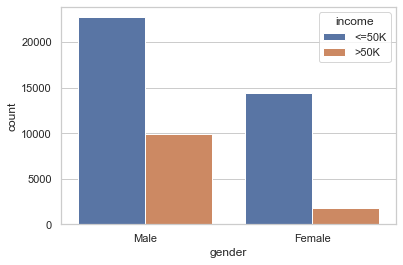

In [148]:
sns.countplot(x='gender',hue='income',data=df)

- The people who are earning more then 50k, Male people are more.

In [149]:
chi_test_stat,chi_critical,p_value,alpha = chi_saqure(df['gender'],df['income'])
chi_test_stat,chi_critical,p_value,alpha

(2248.847679013691, 5.411894431054342, 0.0, 0.020000000000000018)

In [150]:
if(chi2_test_stat > chi2_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")


Reject Null Hypothesis


In [151]:
if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


$$ Both\ gender \& \ income\ variables\ are\ dependent\ variables$$

In [152]:
pd.crosstab(df['income'],df['native-country'],margins=True)
print('*********************************************')
(pd.crosstab(df['income'],df['native-country'],margins=True)/df.shape[0])*100


native-country,Other,United-States,All
income,,,
<=50K,3380,33138,36518
>50K,773,10694,11467
All,4153,43832,47985


*********************************************


native-country,Other,United-States,All
income,,,
<=50K,6.920274,67.847344,74.767618
>50K,1.582654,21.895090,23.477745
All,8.502928,89.742435,98.245363


<AxesSubplot:xlabel='native-country', ylabel='count'>

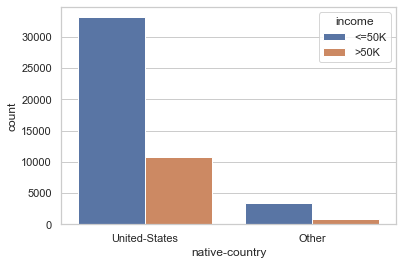

In [153]:
sns.countplot(x='native-country',hue='income',data=df)

- The people who are earning more then 50k, United-States people are more.

In [154]:
chi_test_stat,chi_critical,p_value,alpha = chi_saqure(df['native-country'],df['income'])
chi_test_stat,chi_critical,p_value,alpha

(69.48238221248118,
 5.411894431054342,
 7.710012350005474e-17,
 0.020000000000000018)

In [155]:
if(chi2_test_stat > chi2_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")


Reject Null Hypothesis


In [156]:
if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


$$ Both\ native-country \& \ income\ variables\ are\ dependent\ variables$$

**Let's check how numarical varibles varies with income**

In [157]:
num_col

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

<AxesSubplot:xlabel='income', ylabel='age'>

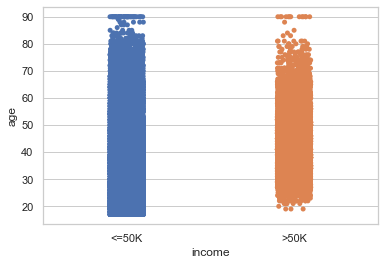

In [158]:
sns.stripplot(y='age',x='income',data=df)

In [159]:
df.pivot_table(index='income',values='age',aggfunc=["max","min","mean",np.median])

,max,min,mean,median
,age,age,age,age
income,,,,
<=50K,90,17,36.872184,34
>50K,90,19,44.275178,43


In [160]:
sns.set_theme(style="ticks",color_codes=True)

In [161]:
df.pivot_table(index='income',values='fnlwgt',aggfunc=["max","min","mean",np.median])

,max,min,mean,median
,fnlwgt,fnlwgt,fnlwgt,fnlwgt
income,,,,
<=50K,1490400,12285,190039.565523,178811
>50K,1226583,13769,188470.574570,176729


<AxesSubplot:xlabel='income', ylabel='fnlwgt'>

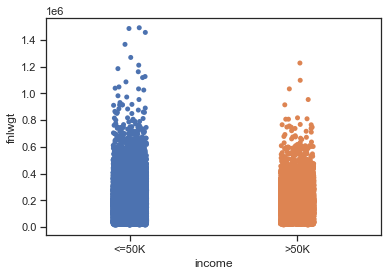

In [162]:
sns.stripplot(y='fnlwgt',x='income',data=df)

- fnlwgt for the income who are getting less then 50k is more

In [163]:
df.pivot_table(index='income',values='hours-per-week',aggfunc=["max","min","mean",np.median])

,max,min,mean,median
,hours-per-week,hours-per-week,hours-per-week,hours-per-week
income,,,,
<=50K,99,1,38.840048,40
>50K,99,1,45.452896,40


<AxesSubplot:xlabel='income', ylabel='hours-per-week'>

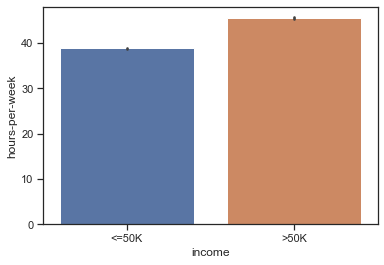

In [164]:
sns.barplot(x='income',y='hours-per-week',data=df)

- The people who are earning more then 50k on average working hours per week

In [165]:
df2 = df.copy()

In [166]:
(df.isnull().sum()/df.shape[0])*100

age                0.000000
workclass          5.730724
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
hours-per-week     0.000000
native-country     1.754637
income             0.000000
age_trans          0.000000
dtype: float64

**Let's replace null values**

In [167]:
df.workclass.unique()
print('**********************************')
df.workclass.mode()

array(['Private', 'Government', nan, 'Self employed ', 'Without-pay',
       'Never-worked'], dtype=object)

**********************************


0    Private
dtype: object

In [394]:
df.workclass.fillna(df.workclass.mode()[0],inplace=True)
      
df.occupation.fillna(df.occupation.mode()[0],inplace=True)
df['native-country'].fillna(df['native-country'].mode()[0],inplace=True)


In [395]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
hours-per-week     0
native-country     0
income             0
age_trans          0
dtype: int64

In [396]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,age_trans
0,25,Private,226802,HS-grad,7,Never-married,Machine-op-inspct,Own-child,Other,Male,40,United-States,<=50K,4.321006
1,38,Private,89814,HS-grad,9,Married,Farming-fishing,Husband,White,Male,50,United-States,<=50K,5.083503
2,28,Government,336951,Assoc-acdm,12,Married,Protective-serv,Husband,White,Male,40,United-States,>50K,4.521908
3,44,Private,160323,Some-college,10,Married,Machine-op-inspct,Husband,Other,Male,40,United-States,>50K,5.363942
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,30,United-States,<=50K,3.760644


- As we see education, educational-num are representing the same . so i would like to remove one of them
- let's remove educational-num, fnlwgt

In [397]:
df.drop(['age','fnlwgt','educational-num'],axis=1, inplace=True)

In [398]:
df.head()

,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,age_trans
0,Private,HS-grad,Never-married,Machine-op-inspct,Own-child,Other,Male,40,United-States,<=50K,4.321006
1,Private,HS-grad,Married,Farming-fishing,Husband,White,Male,50,United-States,<=50K,5.083503
2,Government,Assoc-acdm,Married,Protective-serv,Husband,White,Male,40,United-States,>50K,4.521908
3,Private,Some-college,Married,Machine-op-inspct,Husband,Other,Male,40,United-States,>50K,5.363942
4,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,30,United-States,<=50K,3.760644


In [399]:
df3 = df.copy()

In [174]:

cat_bin = []
cat_more3 = []
for i in df.columns:
    if df[i].dtype == 'O' and df[i].nunique()==2 :
        cat_bin.append(i)
    elif df[i].dtype == 'O' and df[i].nunique()>2: 
        cat_more3.append(i)

In [175]:
for i in cat_bin:
    print('Feature name is :',i)
    print(df[i].unique())
    print('*****************')

Feature name is : race
['Other' 'White']
*****************
Feature name is : gender
['Male' 'Female']
*****************
Feature name is : native-country
['United-States' 'Other']
*****************
Feature name is : income
['<=50K' '>50K']
*****************


In [176]:
df['race'] = df['race'].apply(lambda x :1  if x=='White' else 0 )
df['gender'] = df['gender'].apply(lambda x:1 if x=='male' else 0)
df['native-country'] = df['native-country'].apply(lambda x:1 if x=='United-States' else 0)
df['income'] = df['income'].apply(lambda x: 0 if x=='<=50K' else 1)

In [177]:
df = pd.get_dummies(df)

In [178]:
df.head()


,race,gender,hours-per-week,native-country,income,age_trans,workclass_Government,workclass_Never-worked,workclass_Private,workclass_Self employed,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,0,0,40,1,0,4.321006,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,50,1,0,5.083503,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,40,1,1,4.521908,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,0,0,40,1,1,5.363942,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,30,1,0,3.760644,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [179]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score

In [180]:
sc = StandardScaler()


**Let's define some functions for the model building**

### Model

In [181]:
def eval_metrics(test,proba,th):
        data=pd.DataFrame()
        data['y_pred'] = pd.Series(proba)
        data['y_pred'] = data['y_pred'].apply(lambda x: 1 if x > th else 0)
        accuracy=metrics.accuracy_score(test,data['y_pred'])
        precision= metrics.precision_score(test,data['y_pred'])
        recall= metrics.recall_score(test,data['y_pred'])
        f1_score = metrics.f1_score(test,data['y_pred'])
        roc_auc = metrics.roc_auc_score(test,data['y_pred'])
        return(accuracy,precision,recall,f1_score,roc_auc)


In [182]:
def model(dataset, target,model,th):
    # define x,y
    x = dataset.drop(target,axis=1)
    x_std = sc.fit_transform(x)
    y = dataset[target]
    # split the data
    x_train,x_test,y_train,y_test = train_test_split(x_std,y,test_size=0.3,random_state =1 )
    # build the model
    model.fit(x_train,y_train)
    y_pred = model.predict_proba(x_test)[:,1]
    
    accuracy,precision,recall,f1_score,roc_auc= eval_metrics(y_test,y_pred,0.5)
    
    return(accuracy,precision,recall,f1_score,roc_auc)
    

### LogisticRegression

In [183]:
logistic = LogisticRegression()
accuracy,precision,recall,f1_score,roc_auc = model(df,'income',logistic,0.5)

In [184]:
accuracy,precision,recall,f1_score,roc_auc

(0.8312973452535317,
 0.6950018241517695,
 0.5379836204462016,
 0.606494746895893,
 0.7313748195823521)

In [185]:
# Let's save it in data frame
result = pd.DataFrame()
names = ['name','accuracy','precision','recall','f1_score','roc_auc']
result = pd.DataFrame(columns=names)
result

,name,accuracy,precision,recall,f1_score,roc_auc


In [186]:
result.loc[0]=['Logistic',accuracy,precision,recall,f1_score,roc_auc]

In [187]:
result

,name,accuracy,precision,recall,f1_score,roc_auc
0,Logistic,0.831297,0.695002,0.537984,0.606495,0.731375


### SVM

In [188]:
Support_vector = SVC(probability=True,
    random_state=0)

In [189]:
accuracy,precision,recall,f1_score,roc_auc = model(df,'income',Support_vector,0.5)

In [190]:
accuracy,precision,recall,f1_score,roc_auc

(0.829045246707159,
 0.7174643157010915,
 0.4826320248517368,
 0.5770724295120716,
 0.7110334350320598)

In [191]:
result.loc[1]= ['SVM',accuracy,precision,recall,f1_score,roc_auc]

In [192]:
result

,name,accuracy,precision,recall,f1_score,roc_auc
0,Logistic,0.831297,0.695002,0.537984,0.606495,0.731375
1,SVM,0.829045,0.717464,0.482632,0.577072,0.711033


## Decision Tree

In [193]:
decision_tree = DecisionTreeClassifier(random_state =0)


In [194]:
accuracy,precision,recall,f1_score,roc_auc = model(df,'income',decision_tree,0.5)

In [195]:
result.loc[2] = ['Decision Tree',accuracy,precision,recall,f1_score,roc_auc]

In [196]:
result

,name,accuracy,precision,recall,f1_score,roc_auc
0,Logistic,0.831297,0.695002,0.537984,0.606495,0.731375
1,SVM,0.829045,0.717464,0.482632,0.577072,0.711033
2,Decision Tree,0.783389,0.555589,0.517933,0.536101,0.692957


## Random Forest

In [197]:
random_forest = RandomForestClassifier(random_state=0)


In [198]:
accuracy,precision,recall,f1_score,roc_auc = model(df,'income',random_forest,0.5)

In [199]:
accuracy,precision,recall,f1_score,roc_auc

(0.8086398689688118,
 0.6160629921259843,
 0.5523863315447614,
 0.5824895771292437,
 0.7213425538213367)

In [200]:
result.loc[3] = ['Random Forest',accuracy,precision,recall,f1_score,roc_auc]

In [201]:
result

,name,accuracy,precision,recall,f1_score,roc_auc
0,Logistic,0.831297,0.695002,0.537984,0.606495,0.731375
1,SVM,0.829045,0.717464,0.482632,0.577072,0.711033
2,Decision Tree,0.783389,0.555589,0.517933,0.536101,0.692957
3,Random Forest,0.808640,0.616063,0.552386,0.582490,0.721343


## AdaBoost

In [202]:
AdaBoost = AdaBoostClassifier(random_state=0,base_estimator=RandomForestClassifier(random_state=0,n_estimators=50))


In [203]:
accuracy,precision,recall,f1_score,roc_auc = model(df,'income',AdaBoost,0.5)

In [204]:
accuracy,precision,recall,f1_score,roc_auc

(0.8047498805705317,
 0.6050679851668727,
 0.5529511437447049,
 0.5778368009443706,
 0.7189701723043178)

In [205]:
result.loc[4] = ['AdaBoost',accuracy,precision,recall,f1_score,roc_auc]

In [206]:
result

,name,accuracy,precision,recall,f1_score,roc_auc
0,Logistic,0.831297,0.695002,0.537984,0.606495,0.731375
1,SVM,0.829045,0.717464,0.482632,0.577072,0.711033
2,Decision Tree,0.783389,0.555589,0.517933,0.536101,0.692957
3,Random Forest,0.808640,0.616063,0.552386,0.582490,0.721343
4,AdaBoost,0.804750,0.605068,0.552951,0.577837,0.718970


## GradientBoosting

In [207]:
GradientBoosting = GradientBoostingClassifier()

In [208]:
accuracy,precision,recall,f1_score,roc_auc = model(df,'income',GradientBoosting,0.5)

In [209]:
result.loc[5]= ['GradientBoosting',accuracy,precision,recall,f1_score,roc_auc]

In [210]:
result

,name,accuracy,precision,recall,f1_score,roc_auc
0,Logistic,0.831297,0.695002,0.537984,0.606495,0.731375
1,SVM,0.829045,0.717464,0.482632,0.577072,0.711033
2,Decision Tree,0.783389,0.555589,0.517933,0.536101,0.692957
3,Random Forest,0.808640,0.616063,0.552386,0.582490,0.721343
4,AdaBoost,0.804750,0.605068,0.552951,0.577837,0.718970
5,GradientBoosting,0.837371,0.715884,0.542220,0.617066,0.736823


## XG Boosting

In [211]:
XGBoost = XGBClassifier(random_state=0)

In [212]:
accuracy,precision,recall,f1_score,roc_auc = model(df,'income',XGBoost,0.5)

[19:18:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [213]:
result.loc[6]= ['XGBoost',accuracy,precision,recall,f1_score,roc_auc]

In [214]:
result

,name,accuracy,precision,recall,f1_score,roc_auc
0,Logistic,0.831297,0.695002,0.537984,0.606495,0.731375
1,SVM,0.829045,0.717464,0.482632,0.577072,0.711033
2,Decision Tree,0.783389,0.555589,0.517933,0.536101,0.692957
3,Random Forest,0.808640,0.616063,0.552386,0.582490,0.721343
4,AdaBoost,0.804750,0.605068,0.552951,0.577837,0.718970
5,GradientBoosting,0.837371,0.715884,0.542220,0.617066,0.736823
6,XGBoost,0.833345,0.687607,0.568766,0.622566,0.743211


## KNN

In [215]:
knn = KNeighborsClassifier(n_neighbors=5)

In [216]:
accuracy,precision,recall,f1_score,roc_auc = model(df,'income',knn,0.5)

In [217]:
result.loc[7]= ['Knn',accuracy,precision,recall,f1_score,roc_auc]

In [218]:
result

,name,accuracy,precision,recall,f1_score,roc_auc
0,Logistic,0.831297,0.695002,0.537984,0.606495,0.731375
1,SVM,0.829045,0.717464,0.482632,0.577072,0.711033
2,Decision Tree,0.783389,0.555589,0.517933,0.536101,0.692957
3,Random Forest,0.808640,0.616063,0.552386,0.582490,0.721343
4,AdaBoost,0.804750,0.605068,0.552951,0.577837,0.718970
5,GradientBoosting,0.837371,0.715884,0.542220,0.617066,0.736823
6,XGBoost,0.833345,0.687607,0.568766,0.622566,0.743211
7,Knn,0.815260,0.628942,0.574414,0.600443,0.733211


### Research_paper 1

In [219]:
df2.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,age_trans
0,25,Private,226802,HS-grad,7,Never-married,Machine-op-inspct,Own-child,Other,Male,40,United-States,<=50K,4.321006
1,38,Private,89814,HS-grad,9,Married,Farming-fishing,Husband,White,Male,50,United-States,<=50K,5.083503
2,28,Government,336951,Assoc-acdm,12,Married,Protective-serv,Husband,White,Male,40,United-States,>50K,4.521908
3,44,Private,160323,Some-college,10,Married,Machine-op-inspct,Husband,Other,Male,40,United-States,>50K,5.363942
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,30,United-States,<=50K,3.760644


In [220]:
df2.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
hours-per-week        0
native-country      857
income                0
age_trans             0
dtype: int64

**Let's drop null values**

In [221]:
df2.dropna(inplace=True)

In [222]:
df2.shape

(45222, 14)

In [223]:
df2.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
hours-per-week     0
native-country     0
income             0
age_trans          0
dtype: int64

**There are no null values in the data.**
- Let's delete the unneassery columns

In [224]:
df2.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'hours-per-week', 'native-country', 'income', 'age_trans'],
      dtype='object')

In [225]:
df2.drop(['fnlwgt','educational-num','age_trans'],axis=1,inplace=True)

In [226]:
df2.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,HS-grad,Never-married,Machine-op-inspct,Own-child,Other,Male,40,United-States,<=50K
1,38,Private,HS-grad,Married,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Government,Assoc-acdm,Married,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,Some-college,Married,Machine-op-inspct,Husband,Other,Male,40,United-States,>50K
5,34,Private,HS-grad,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K


In [227]:
df1.replace(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married','Separated','Widowed','Married'],
 ['not married','married','married','married','not married','not married','not married','married'], inplace = True)


In [228]:
df1.workclass.dtype

dtype('O')

In [229]:
cat_col2 = []
cat_col_more2 = []

for i in df1.columns:
    if df1[i].dtype == 'O' and df1[i].nunique()==2:
        cat_col2.append(i)
    elif df1[i].dtype == 'O' and df1[i].nunique()>2:
        cat_col_more2.append(i)
        
        
        
        

In [230]:
cat_col2
cat_col_more2

['marital-status', 'race', 'gender', 'native-country', 'income']

['workclass', 'education', 'occupation', 'relationship']

In [231]:
df2.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,HS-grad,Never-married,Machine-op-inspct,Own-child,Other,Male,40,United-States,<=50K
1,38,Private,HS-grad,Married,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Government,Assoc-acdm,Married,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,Some-college,Married,Machine-op-inspct,Husband,Other,Male,40,United-States,>50K
5,34,Private,HS-grad,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K


In [232]:
for i in cat_col2:
    df2[i] = pd.get_dummies(df2[i],prefix=True,drop_first=True)

In [233]:
df2 = pd.get_dummies(df2)

In [234]:
df2.head()

,age,marital-status,race,gender,hours-per-week,native-country,income,workclass_Government,workclass_Private,workclass_Self employed,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,0,0,1,40,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,38,0,1,1,50,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,28,0,1,1,40,1,1,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,44,0,0,1,40,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
5,34,0,1,1,30,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [235]:
high_income = df2[df2['income'] == 1]
low_income = df2[df2['income'] == 0]
train_data = pd.concat([high_income.sample(frac=0.8, random_state=1),low_income.sample(frac=0.8, random_state=1)]) 
test_data=pd.concat([high_income.sample(frac=0.2, random_state=1),low_income.sample(frac=0.2, random_state=1)])

In [236]:
train_data.head()

,age,marital-status,race,gender,hours-per-week,native-country,income,workclass_Government,workclass_Private,workclass_Self employed,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
29795,38,0,1,1,40,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
39945,56,0,1,1,55,1,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0
28296,46,0,1,0,35,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
43914,32,0,1,1,56,0,1,1,0,0,...,1,0,0,0,1,0,0,0,0,0
28422,46,0,1,1,60,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [237]:
from sklearn.preprocessing import MinMaxScaler
MinMax = MinMaxScaler()

In [238]:
def model1(train_data,test_data ,target,model,th):
    # define x,y
    x_train = train_data.drop(target,axis=1)
    x_train = MinMax.fit_transform(x_train)
    y_train = train_data[target]
    
    x_test = test_data.drop(target,axis=1)
    x_test = MinMax.fit_transform(x_test)
    y_test = test_data[target]
    
    
    # build the model
    model.fit(x_train,y_train)
    y_pred = model.predict_proba(x_test)[:,1]
    
    accuracy,precision,recall,f1_score,roc_auc= eval_metrics(y_test,y_pred,0.5)
    
    return(accuracy,precision,recall,f1_score,roc_auc)
    

### Logistic Regression

In [239]:
logistic = LogisticRegression()

In [240]:
accuracy,precision,recall,f1_score,roc_auc =model1(train_data,test_data ,'income',logistic,0.5)

In [241]:
accuracy,precision,recall,f1_score,roc_auc

(0.8257600884466556,
 0.6860335195530727,
 0.5477252453166815,
 0.6091269841269842,
 0.7325573161759065)

In [242]:
name = ['name','accuracy','precision','recall','f1_score','roc_auc']
final_results = pd.DataFrame(columns=name)

In [243]:
final_results

,name,accuracy,precision,recall,f1_score,roc_auc


In [244]:
final_results.loc[0] = ['Logistic',accuracy,precision,recall,f1_score,roc_auc]

In [245]:
final_results

,name,accuracy,precision,recall,f1_score,roc_auc
0,Logistic,0.82576,0.686034,0.547725,0.609127,0.732557


### SVM

In [246]:
Support_vector = SVC(probability=True,random_state=0)
accuracy,precision,recall,f1_score,roc_auc = model1(train_data,test_data,'income',Support_vector,0.5)
final_results.loc[1]= ['SVM',accuracy,precision,recall,f1_score,roc_auc]

In [247]:
final_results

,name,accuracy,precision,recall,f1_score,roc_auc
0,Logistic,0.825760,0.686034,0.547725,0.609127,0.732557
1,SVM,0.825207,0.716437,0.487957,0.580525,0.712154


### DecesionTree

In [248]:
decision_tree = DecisionTreeClassifier(random_state =0)
accuracy,precision,recall,f1_score,roc_auc = model1(train_data,test_data,'income',decision_tree,0.5)
final_results.loc[2] = ['Decision Tree',accuracy,precision,recall,f1_score,roc_auc]

In [249]:
final_results

,name,accuracy,precision,recall,f1_score,roc_auc
0,Logistic,0.825760,0.686034,0.547725,0.609127,0.732557
1,SVM,0.825207,0.716437,0.487957,0.580525,0.712154
2,Decision Tree,0.955445,0.958146,0.857716,0.905154,0.922684


### Random Forest

In [250]:
random_forest = RandomForestClassifier(random_state=0)
accuracy,precision,recall,f1_score,roc_auc = model1(train_data,test_data,'income',random_forest,0.5)
final_results.loc[3] = ['Random Forest',accuracy,precision,recall,f1_score,roc_auc]

In [251]:
final_results

,name,accuracy,precision,recall,f1_score,roc_auc
0,Logistic,0.825760,0.686034,0.547725,0.609127,0.732557
1,SVM,0.825207,0.716437,0.487957,0.580525,0.712154
2,Decision Tree,0.955445,0.958146,0.857716,0.905154,0.922684
3,Random Forest,0.954450,0.920883,0.892953,0.906703,0.933835


### AdaBoost

In [252]:
AdaBoost = AdaBoostClassifier(random_state=0,base_estimator=RandomForestClassifier(random_state=0,n_estimators=50))
accuracy,precision,recall,f1_score,roc_auc = model1(train_data,test_data,'income',AdaBoost,0.5)
final_results.loc[4] = ['AdaBoost',accuracy,precision,recall,f1_score,roc_auc]

In [253]:
final_results

,name,accuracy,precision,recall,f1_score,roc_auc
0,Logistic,0.825760,0.686034,0.547725,0.609127,0.732557
1,SVM,0.825207,0.716437,0.487957,0.580525,0.712154
2,Decision Tree,0.955445,0.958146,0.857716,0.905154,0.922684
3,Random Forest,0.954450,0.920883,0.892953,0.906703,0.933835
4,AdaBoost,0.954671,0.922899,0.891615,0.906987,0.933533


### GradientBoosting

In [254]:
GradientBoosting = GradientBoostingClassifier()
accuracy,precision,recall,f1_score,roc_auc = model1(train_data,test_data,'income',GradientBoosting,0.5)
final_results.loc[5]= ['GradientBoosting',accuracy,precision,recall,f1_score,roc_auc]

In [255]:
final_results

,name,accuracy,precision,recall,f1_score,roc_auc
0,Logistic,0.825760,0.686034,0.547725,0.609127,0.732557
1,SVM,0.825207,0.716437,0.487957,0.580525,0.712154
2,Decision Tree,0.955445,0.958146,0.857716,0.905154,0.922684
3,Random Forest,0.954450,0.920883,0.892953,0.906703,0.933835
4,AdaBoost,0.954671,0.922899,0.891615,0.906987,0.933533
5,GradientBoosting,0.837922,0.722477,0.561998,0.632213,0.745427


### XGBoosting

In [256]:
XGBoost = XGBClassifier(random_state=0)
accuracy,precision,recall,f1_score,roc_auc = model1(train_data,test_data,'income',XGBoost,0.5)
final_results.loc[6]= ['XGBoost',accuracy,precision,recall,f1_score,roc_auc]

[19:28:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [257]:
final_results

,name,accuracy,precision,recall,f1_score,roc_auc
0,Logistic,0.825760,0.686034,0.547725,0.609127,0.732557
1,SVM,0.825207,0.716437,0.487957,0.580525,0.712154
2,Decision Tree,0.955445,0.958146,0.857716,0.905154,0.922684
3,Random Forest,0.954450,0.920883,0.892953,0.906703,0.933835
4,AdaBoost,0.954671,0.922899,0.891615,0.906987,0.933533
5,GradientBoosting,0.837922,0.722477,0.561998,0.632213,0.745427
6,XGBoost,0.856606,0.748031,0.635593,0.687244,0.782518


### KNN

In [258]:
knn = KNeighborsClassifier(n_neighbors=5)
accuracy,precision,recall,f1_score,roc_auc = model1(train_data,test_data,'income',knn,0.5)
final_results.loc[7]= ['Knn',accuracy,precision,recall,f1_score,roc_auc]

In [259]:
final_results

,name,accuracy,precision,recall,f1_score,roc_auc
0,Logistic,0.825760,0.686034,0.547725,0.609127,0.732557
1,SVM,0.825207,0.716437,0.487957,0.580525,0.712154
2,Decision Tree,0.955445,0.958146,0.857716,0.905154,0.922684
3,Random Forest,0.954450,0.920883,0.892953,0.906703,0.933835
4,AdaBoost,0.954671,0.922899,0.891615,0.906987,0.933533
5,GradientBoosting,0.837922,0.722477,0.561998,0.632213,0.745427
6,XGBoost,0.856606,0.748031,0.635593,0.687244,0.782518
7,Knn,0.859480,0.736253,0.674844,0.704212,0.797587


In [260]:
result

,name,accuracy,precision,recall,f1_score,roc_auc
0,Logistic,0.831297,0.695002,0.537984,0.606495,0.731375
1,SVM,0.829045,0.717464,0.482632,0.577072,0.711033
2,Decision Tree,0.783389,0.555589,0.517933,0.536101,0.692957
3,Random Forest,0.808640,0.616063,0.552386,0.582490,0.721343
4,AdaBoost,0.804750,0.605068,0.552951,0.577837,0.718970
5,GradientBoosting,0.837371,0.715884,0.542220,0.617066,0.736823
6,XGBoost,0.833345,0.687607,0.568766,0.622566,0.743211
7,Knn,0.815260,0.628942,0.574414,0.600443,0.733211


**After Stratified sampling we can see that some of the models performing better when comapred to earlier one. We can see the drastic change in the accuracy for the Decision Tree,Random Forest, AdaBoost models and in KNN also accuary was increased**

## Research Paper 2

In [400]:
df3.head()

,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,age_trans
0,Private,HS-grad,Never-married,Machine-op-inspct,Own-child,Other,Male,40,United-States,<=50K,4.321006
1,Private,HS-grad,Married,Farming-fishing,Husband,White,Male,50,United-States,<=50K,5.083503
2,Government,Assoc-acdm,Married,Protective-serv,Husband,White,Male,40,United-States,>50K,4.521908
3,Private,Some-college,Married,Machine-op-inspct,Husband,Other,Male,40,United-States,>50K,5.363942
4,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,30,United-States,<=50K,3.760644


In [402]:
cat_col2 = []
cat_col_more2 = []

for i in df3.columns:
    if df3[i].dtype == 'O' and df3[i].nunique()==2:
        cat_col2.append(i)
    elif df3[i].dtype == 'O' and df3[i].nunique()>2:
        cat_col_more2.append(i)

In [403]:
cat_col_more2

['workclass', 'education', 'marital-status', 'occupation', 'relationship']

In [404]:
from sklearn.preprocessing import LabelEncoder

In [405]:
La = LabelEncoder()

In [406]:
for i in cat_col_more2:
    df3[i] = La.fit_transform(df3[i])
    

In [409]:
df3 = pd.get_dummies(df3,drop_first=True)

In [412]:
df3.head()

,workclass,education,marital-status,occupation,relationship,hours-per-week,age_trans,race_White,gender_Male,native-country_United-States,income_>50K
0,2,5,2,6,3,40,4.321006,0,1,1,0
1,2,5,0,4,0,50,5.083503,1,1,1,0
2,0,0,0,10,0,40,4.521908,1,1,1,1
3,2,9,0,6,0,40,5.363942,0,1,1,1
4,2,9,2,9,3,30,3.760644,1,0,1,0


### GradientBoosting

In [410]:
GradientBoosting = GradientBoostingClassifier()

In [413]:
accuracy,precision,recall,f1_score,roc_auc = model(df3,'income_>50K',GradientBoosting,0.5)


In [414]:
accuracy,precision,recall,f1_score,roc_auc

(0.8373029413771924,
 0.7116721551408708,
 0.549279864445072,
 0.6200191265540326,
 0.7391827687956102)

**There was not much diffrence in the results**